# Introduction

The goal of this project is to analyse biodiversity data from the National Parks Service, particularly around various species observed in different national park location.

This project will scope, analyze, prepare, plot data and seek to explain the findings from the analysis.

**Data sources**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

### Project Goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project.

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include:

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks.

### Evaluation

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.


# Loading the Data

To analyze the status of conservation of species and their observations in national parks, load the datasets into `DataFrames`. Once loaded as `DataFrames` the data can be explored and visualized with Python.

In the next steps, `Observations.csv`  and `Species_info.csv` are read in as `DataFrames` called `observations` and `species` respectively. The newly created `DataFrames` are glimpsed with `.head()` and `.info()`to check its contents.

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [263]:
observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

In [264]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [265]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [266]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [267]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


# Analysis

### 1. What is the distribution of conservation status for species?

Next steps is to check on the dataframe `species` conservation_status.

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservtion
- `Threatend`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`:formerly `Endangered` but currently neither in danger of extinction all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`

In [268]:
species.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [269]:
print("NAN values: ", species.conservation_status.isna().sum())

NAN values:  5633


In [270]:
species.fillna("No Intervention", inplace=True)
species.conservation_status.value_counts()

No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

Next step is to checkout the different categories that are nested in the `conservation status` column except for the ones that do not require an intervention.

In [271]:
species_conservation = species[species.conservation_status != "No Intervention"].groupby(["conservation_status", "category"])["scientific_name"].count().unstack()

print(species_conservation)

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                 1.0   4.0   3.0     7.0                NaN   
In Recovery                NaN   3.0   NaN     1.0                NaN   
Species of Concern         4.0  72.0   4.0    28.0                5.0   
Threatened                 2.0   NaN   4.0     2.0                NaN   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered               NaN             1.0  
In Recovery              NaN             NaN  
Species of Concern       5.0            43.0  
Threatened               NaN             2.0  


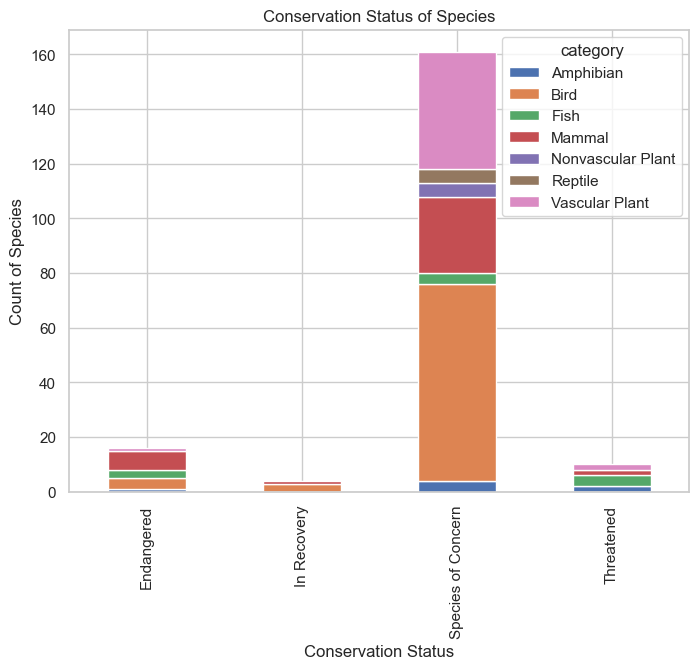

In [272]:
ax = species_conservation.plot(kind="bar", stacked=True, figsize=(8,6))

ax.set_xlabel("Conservation Status")
ax.set_ylabel("Count of Species")
ax.set_title("Conservation Status of Species")

plt.show()
plt.close()

### 2. Are certain types of species more likely to be endangered?

17.05 and 15.37 percent of Mammals respectively of Birds are protected.

In [273]:
species["is_protected"] = species.conservation_status != "No Intervention"

In [274]:
#groupby
category_counts = species.groupby(["category", "is_protected"]).scientific_name.nunique().reset_index()

#create pivot table
category_counts = pd.pivot(category_counts, index="category", columns="is_protected", values="scientific_name").reset_index()

category_counts.columns = ["species", "not_protected", "protected"]

#add percent column
category_counts["percent_protected"] = (category_counts.protected/(category_counts.not_protected + category_counts.protected))*100


category_counts = category_counts.sort_values('percent_protected', ascending=False).reset_index(drop=True)
category_counts

,species,not_protected,protected,percent_protected
0,Mammal,146,30,17.045455
1,Bird,413,75,15.368852
2,Amphibian,72,7,8.860759
3,Fish,115,11,8.730159
4,Reptile,73,5,6.410256
5,Nonvascular Plant,328,5,1.501502
6,Vascular Plant,4216,46,1.079305


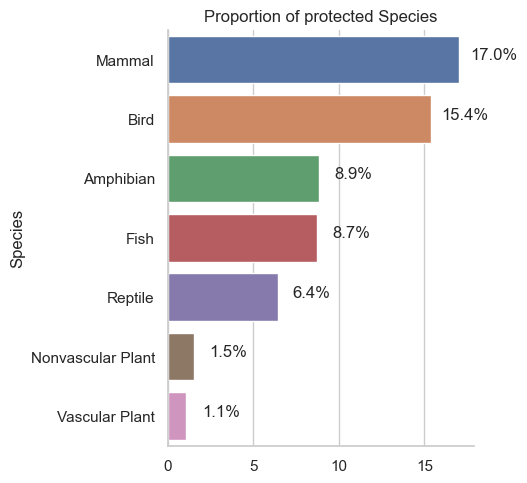

In [300]:
plot = sns.catplot(data=category_counts, y="species", x="percent_protected", kind="bar", orient="h")

plt.title("Proportion of protected Species")
plt.xlabel("")
plt.ylabel("Species")

#display the values above each bar
for index, row in category_counts.iterrows():
    plot.ax.text(y=index, x=row["percent_protected"]+2, s=f"{row['percent_protected']:.1f}%", ha="center")

plt.show()
plt.close()

### 3. Are the differences between species and their conservation status significant?

In [276]:
species_observation = pd.merge(observations, species, how="left", on="scientific_name")

In [277]:
species_observation.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",No Intervention,False
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,No Intervention,False
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,No Intervention,False
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,No Intervention,False
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,No Intervention,False


In [278]:
species_observation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  25632 non-null  object
 6   is_protected         25632 non-null  bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 1.4+ MB


The merged dataframe cotains 25'632 entries with 6 columns (5 objects, 1 int64).

- `scientific_name`: 5'541 unique elements in the dataframe
- `park_name`:  4 unique elements
- `observations`: The dataframes counts 3'645'245 observations of species in total.
- `category` 7 unique elements
- `common_names`: 5'504 unique elements
- `conservation_status`: 4

Checking for NA's showed, that there are 24'752 NA's for the variabel `conservation_status`. We are going to fill the NA's wit the status "Unknown"

In [279]:
species_observation["conservation_status"] = species_observation["conservation_status"].fillna("Unknown")

In [280]:
print(species_observation.park_name.value_counts())

Great Smoky Mountains National Park    6408
Yosemite National Park                 6408
Bryce National Park                    6408
Yellowstone National Park              6408
Name: park_name, dtype: int64


In [281]:
#create sample Dataframe
species_categories =species_observation.category.value_counts(normalize=True).to_frame()
species_categories = species_categories.rename_axis("Species").reset_index().rename(columns={"category": "percentage"})

#calculate the percentage of each category
species_categories.percentage = species_categories.percentage*100


print(species_categories)

             Species  percentage
0     Vascular Plant   76.310861
1               Bird    9.222846
2  Nonvascular Plant    5.196629
3             Mammal    4.681648
4               Fish    2.044320
5          Amphibian    1.279650
6            Reptile    1.264045


In [282]:
#Filter Vascular Plant got get value_counts for animals
species_categories_animals = species_observation[~species_observation.category.isin(["Vascular Plant", "Nonvascular Plant"])].category.value_counts(normalize=True).to_frame().reset_index()

#rename columns
species_categories_animals = species_categories_animals.rename(columns={"index": "Species", "category": "percentage"})

species_categories_animals.percentage = species_categories_animals.percentage*100




print(species_categories_animals)

     Species  percentage
0       Bird   49.873418
1     Mammal   25.316456
2       Fish   11.054852
3  Amphibian    6.919831
4    Reptile    6.835443


In [283]:
print(species_observation.conservation_status.value_counts())

No Intervention       24752
Species of Concern      732
Endangered               80
Threatened               44
In Recovery              24
Name: conservation_status, dtype: int64


### Species


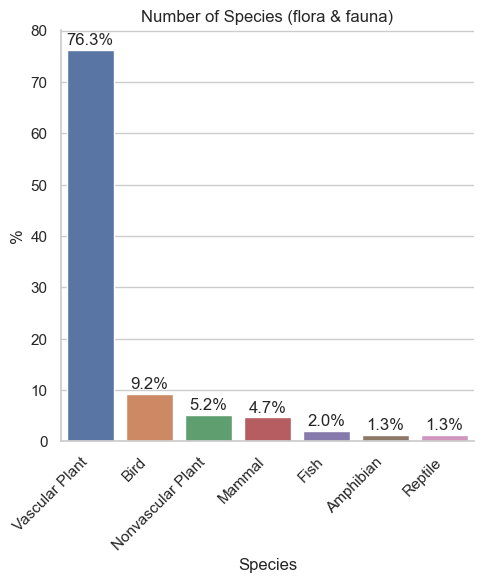

In [284]:
plot = sns.catplot(data=species_categories, x="Species", y="percentage", kind="bar")
plt.title("Number of Species (flora & fauna)")
#rotate the x-axis
plot.ax.set_xticklabels(species_categories["Species"], rotation=45, ha="right")
#set the y-axis label to %
plot.set(ylabel="%")

#display the values above each bar
for index, row in species_categories.iterrows():
    plot.ax.text(x=index, y=row["percentage"]+1, s=f"{row['percentage']:.1f}%", ha="center")

plt.show()
plt.close()


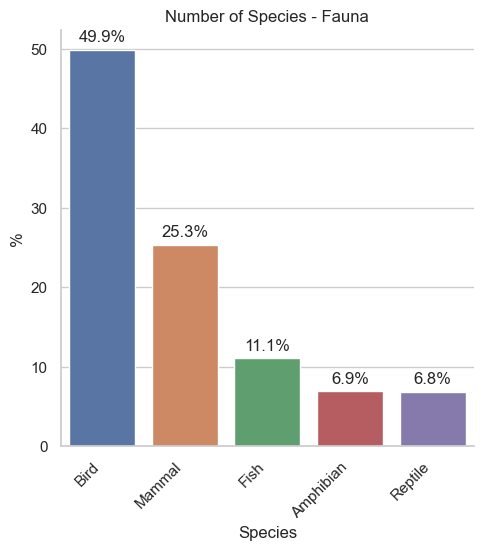

In [285]:
plot = sns.catplot(data=species_categories_animals, x="Species", y="percentage", kind="bar")

#rotate the x-axis
plot.ax.set_xticklabels(species_categories_animals["Species"], rotation=45, ha="right")
plt.title("Number of Species - Fauna")
# set the y-axis label to %
plot.set(ylabel="%")

#display the values above each bar
for index, row in species_categories_animals.iterrows():
    plot.ax.text(x=index, y=row["percentage"]+1,s=f"{row['percentage']:.1f}%", ha="center")


plt.show()
plt.close()